# Data Exploration

In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import plotly.express as pl

In [492]:
data = pd.read_csv("housing_data.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [493]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### total_bedrooms has a few null entries, so it's fine to drop those data points

In [494]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### Trying to predict median_house_value so separate the data accordingly

In [495]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [496]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)
training_data = x_train.join(y_train)
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15847,-122.44,37.75,21.0,5457.0,1247.0,2304.0,1180.0,4.5469,NEAR BAY,409700.0
9305,-122.55,38.00,18.0,3119.0,803.0,1395.0,722.0,3.9265,NEAR BAY,301100.0
12340,-116.53,33.85,16.0,10077.0,2186.0,3048.0,1337.0,2.9647,INLAND,110900.0
19539,-120.96,37.65,34.0,1700.0,325.0,972.0,326.0,2.4485,INLAND,95500.0
13766,-117.08,34.08,34.0,45.0,11.0,39.0,14.0,3.0625,INLAND,500001.0
...,...,...,...,...,...,...,...,...,...,...
14632,-117.20,32.80,34.0,4854.0,912.0,2089.0,854.0,3.8542,NEAR OCEAN,200000.0
6714,-118.18,34.13,39.0,2902.0,460.0,1007.0,420.0,6.1953,<1H OCEAN,363000.0
17062,-122.21,37.48,39.0,1535.0,340.0,1204.0,370.0,2.8482,NEAR BAY,247200.0
1675,-122.26,38.03,41.0,1631.0,282.0,752.0,288.0,3.9345,NEAR BAY,150200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

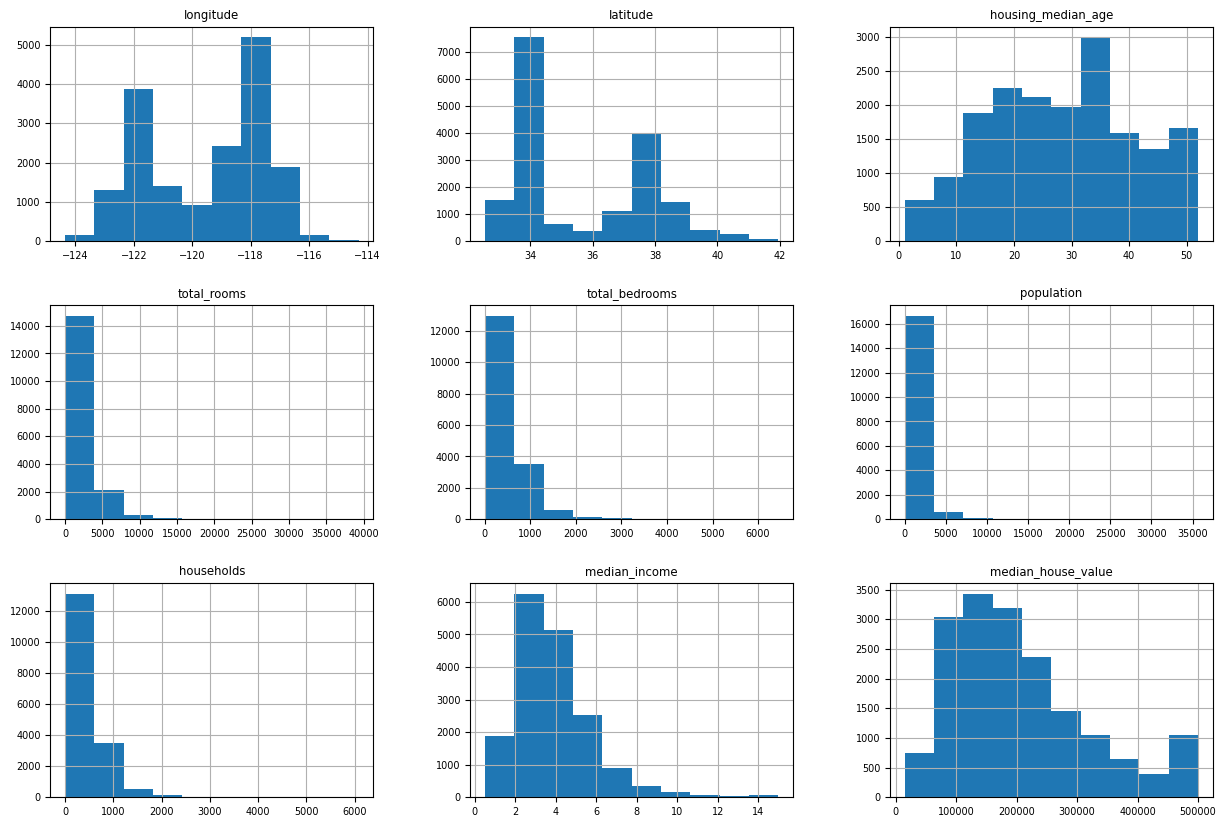

In [497]:
training_data.hist(figsize = (15,10))

In [498]:
correlation = training_data.corr(numeric_only = True)
correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924636,-0.107722,0.050043,0.075499,0.103823,0.061484,-0.019319,-0.048737
latitude,-0.924636,1.000000,0.010295,-0.040854,-0.072457,-0.111891,-0.076422,-0.076737,-0.141469
housing_median_age,-0.107722,0.010295,1.000000,-0.361147,-0.321322,-0.294917,-0.303610,-0.115797,0.108458
total_rooms,0.050043,-0.040854,-0.361147,1.000000,0.930436,0.856583,0.918945,0.197666,0.134666
total_bedrooms,0.075499,-0.072457,-0.321322,0.930436,1.000000,0.878615,0.979597,-0.008415,0.050406
population,0.103823,-0.111891,-0.294917,0.856583,0.878615,1.000000,0.908448,0.003323,-0.024210
households,0.061484,-0.076422,-0.303610,0.918945,0.979597,0.908448,1.000000,0.012105,0.065040
median_income,-0.019319,-0.076737,-0.115797,0.197666,-0.008415,0.003323,0.012105,1.000000,0.688054
median_house_value,-0.048737,-0.141469,0.108458,0.134666,0.050406,-0.024210,0.065040,0.688054,1.000000


<Axes: >

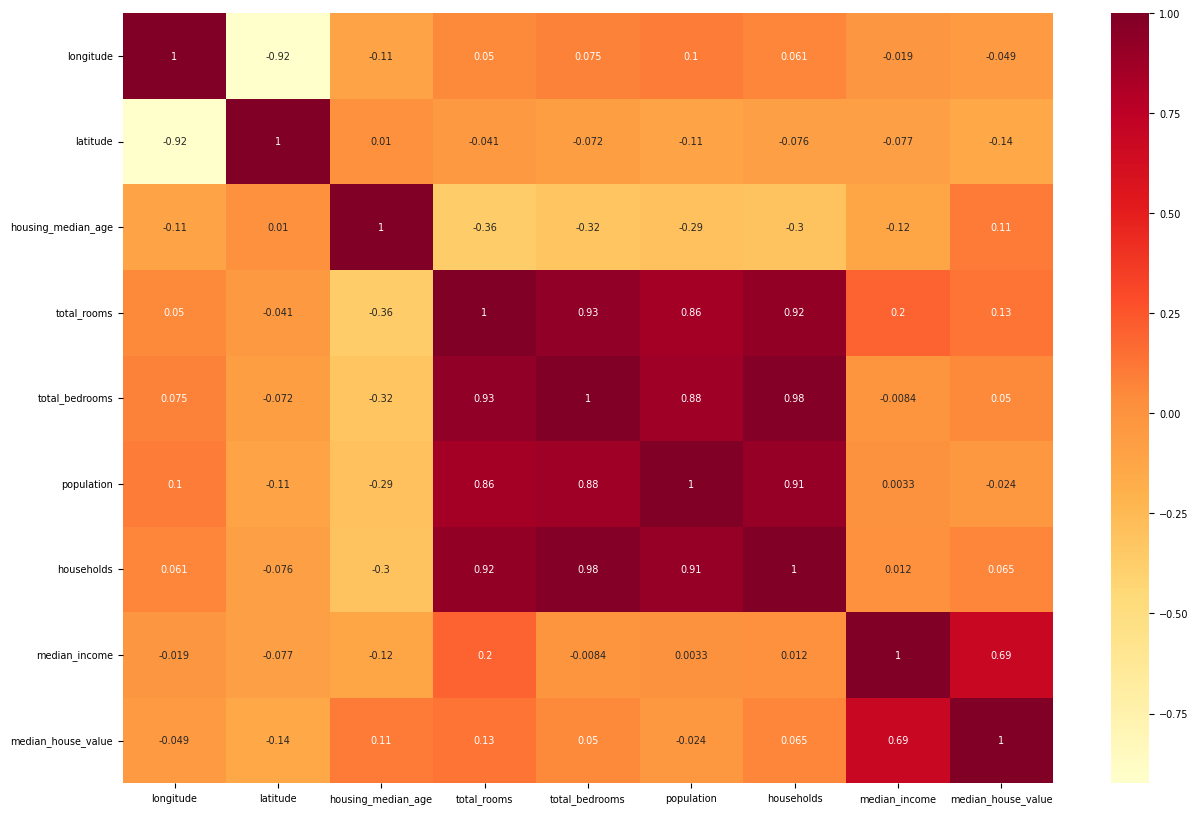

In [499]:
plt.figure(figsize = (15,10))
sea.heatmap(correlation, annot = True, cmap = "YlOrRd")

# Data Preprocessing / Feature Engineering

### Histograms show that total_rooms, total_bedrooms, population, and households have right-skewed shape. Can use log of data to get closer to bell curve shape

In [500]:
log_epsilon = 1e-32
training_data['total_rooms'] = np.log(training_data['total_rooms'] + log_epsilon)
training_data['total_bedrooms'] = np.log(training_data['total_bedrooms'] + log_epsilon)
training_data['population'] = np.log(training_data['population'] + log_epsilon)
training_data['households'] = np.log(training_data['households'] + log_epsilon)

### The histograms for those 4 features now have a shape closer to Gaussian bell curve. Hence, those features likely follow a log-normal distribution

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

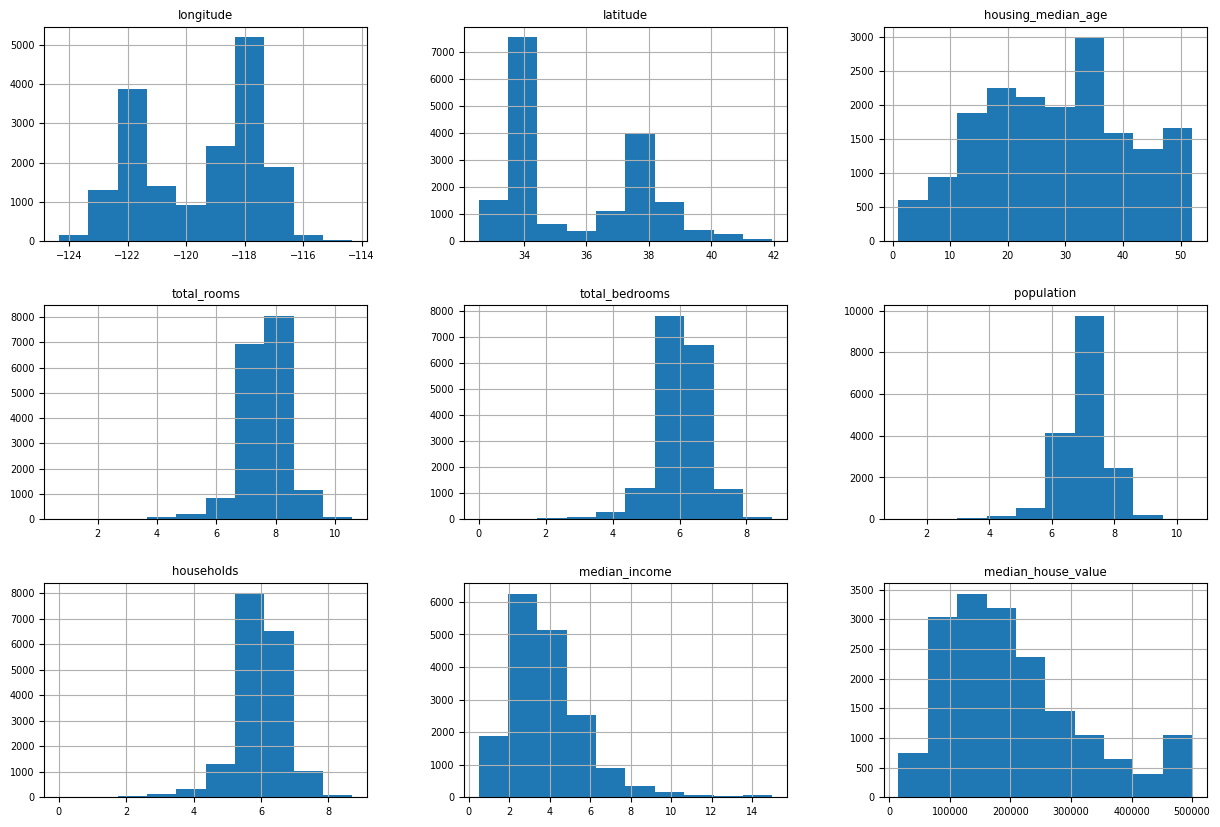

In [501]:
training_data.hist(figsize = (15,10))

### Visualize effect of ocean proximity on house prices - median house value can be higher when you are closer to the coast 

/Users/ufarooqui/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ufarooqui/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ufarooqui/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='latitude', ylabel='longitude'>

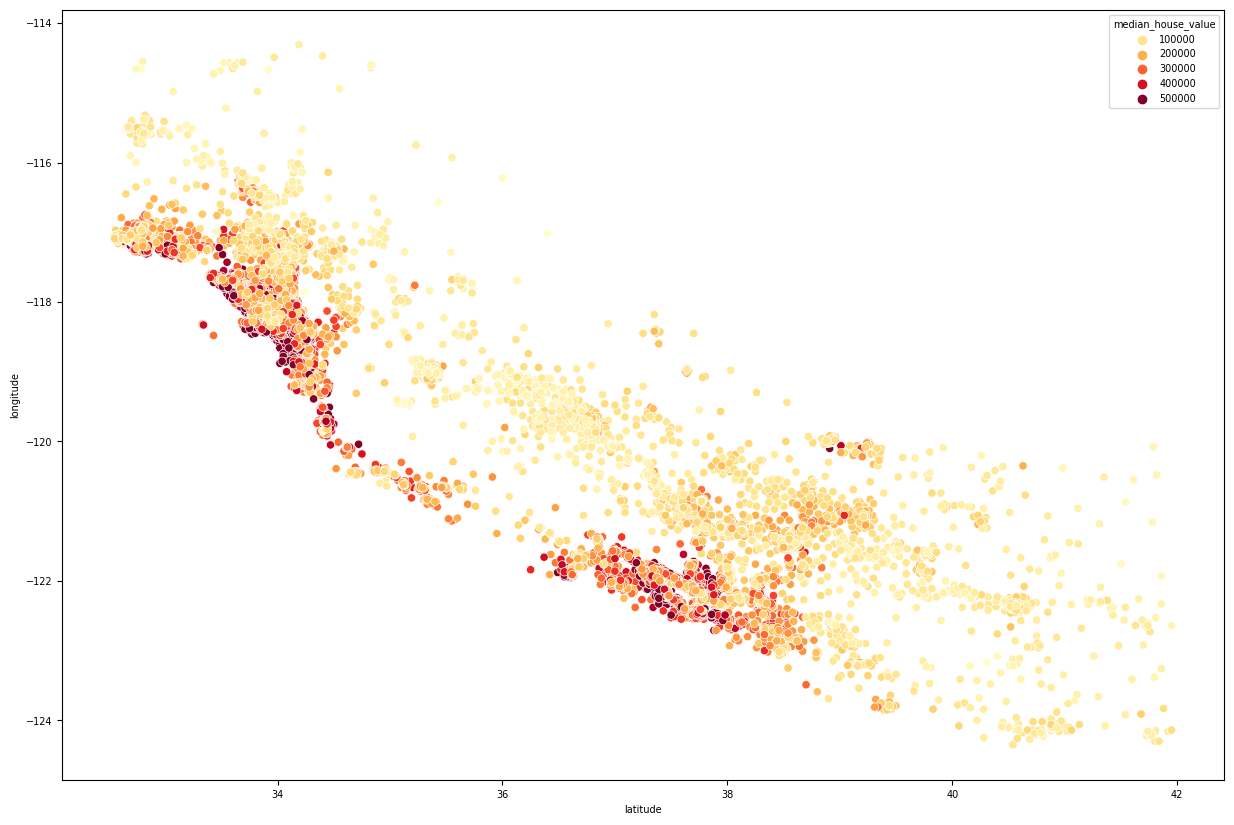

In [502]:
plt.figure(figsize = (15,10))
sea.scatterplot(x = 'latitude', y = 'longitude', data = training_data, hue = 'median_house_value', palette = 'YlOrRd')

### Utilize one-hot encoding for ocean_proximity feature since it may have an impact on median_house_value

In [503]:
training_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7710
INLAND        5492
NEAR OCEAN    2246
NEAR BAY      1916
ISLAND           4
Name: count, dtype: int64

In [504]:
training_data = training_data.join(pd.get_dummies(training_data.ocean_proximity, dtype = int)).drop(['ocean_proximity'], axis = 1)
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15847,-122.44,37.75,21.0,8.604654,7.128496,7.742402,7.073270,4.5469,409700.0,0,0,0,1,0
9305,-122.55,38.00,18.0,8.045268,6.688355,7.240650,6.582025,3.9265,301100.0,0,0,0,1,0
12340,-116.53,33.85,16.0,9.218011,7.689829,8.022241,7.198184,2.9647,110900.0,0,1,0,0,0
19539,-120.96,37.65,34.0,7.438384,5.783825,6.879356,5.786897,2.4485,95500.0,0,1,0,0,0
13766,-117.08,34.08,34.0,3.806662,2.397895,3.663562,2.639057,3.0625,500001.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14632,-117.20,32.80,34.0,8.487558,6.815640,7.644441,6.749931,3.8542,200000.0,0,0,0,0,1
6714,-118.18,34.13,39.0,7.973155,6.131226,6.914731,6.040255,6.1953,363000.0,1,0,0,0,0
17062,-122.21,37.48,39.0,7.336286,5.828946,7.093405,5.913503,2.8482,247200.0,0,0,0,1,0
1675,-122.26,38.03,41.0,7.396949,5.641907,6.622736,5.662960,3.9345,150200.0,0,0,0,1,0


### Generate new heatmap with one-hot encoding of ocean_proximity

<Axes: >

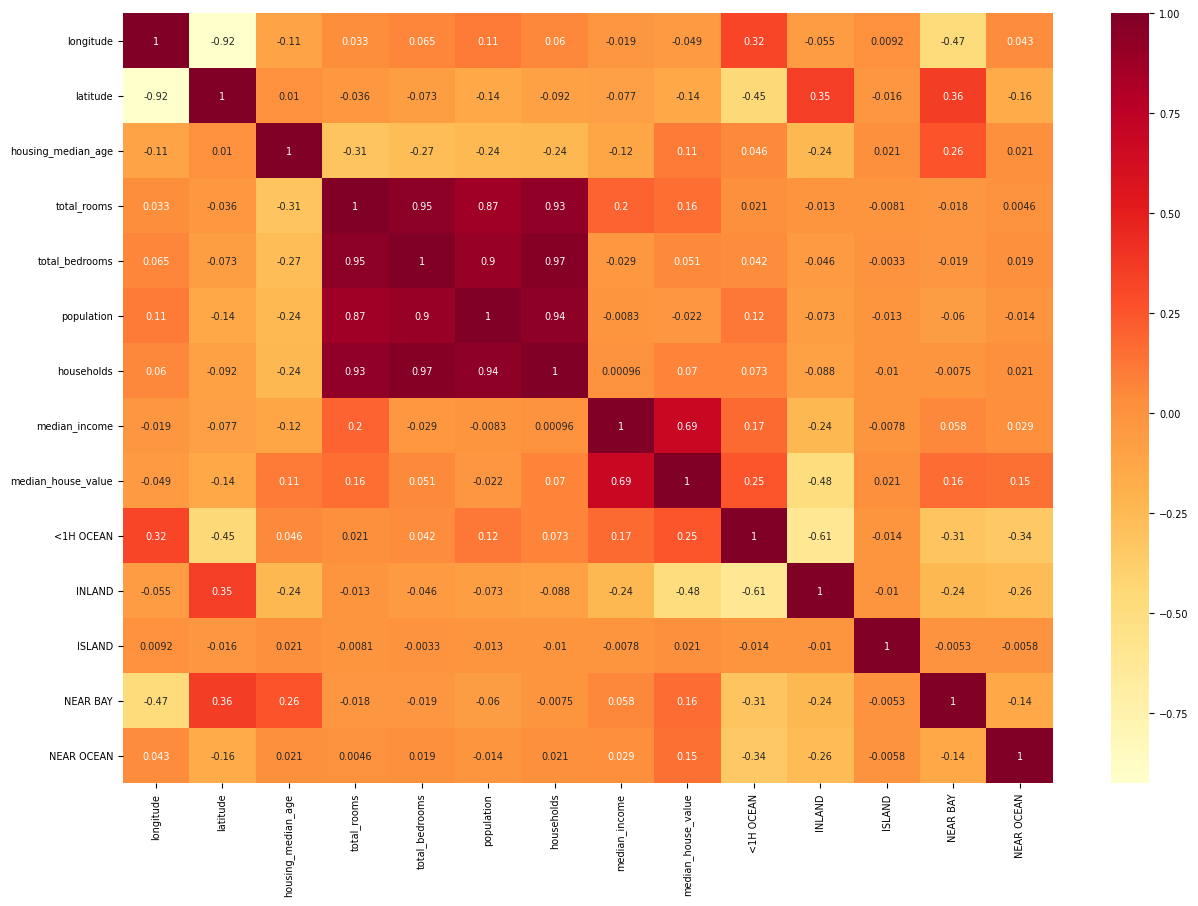

In [505]:
plt.figure(figsize = (15,10))
sea.heatmap(training_data.corr(), annot = True, cmap = "YlOrRd")

## Linear Regression Model

In [506]:
from sklearn.linear_model import LinearRegression

x_train, y_train = training_data.drop(['median_house_value'], axis = 1), training_data['median_house_value']
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

### Modify the test data accordingly

In [507]:
testing_data = x_test.join(y_test)
testing_data['total_rooms'] = np.log(testing_data['total_rooms'] + log_epsilon)
testing_data['total_bedrooms'] = np.log(testing_data['total_bedrooms'] + log_epsilon)
testing_data['population'] = np.log(testing_data['population'] + log_epsilon)
testing_data['households'] = np.log(testing_data['households'] + log_epsilon)
testing_data = testing_data.join(pd.get_dummies(testing_data.ocean_proximity, dtype = int)).drop(['ocean_proximity'], axis = 1)
x_test, y_test = testing_data.drop(['median_house_value'], axis = 1), testing_data['median_house_value']

### Metrics to analyze accuracy for linear model

In [508]:
from sklearn.metrics import mean_squared_error, r2_score

median_house_value_prediction = linear_regression.predict(x_test)
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, median_house_value_prediction))
regression_score = r2_score(y_test, median_house_value_prediction)
data_points = np.arange(1, np.array(x_test).shape[0] + 1)
print("Root Mean Squared Error: ", root_mean_squared_error)
print("Coefficient of Determination Regression Score: ", regression_score)


Root Mean Squared Error:  65150.27749444355
Coefficient of Determination Regression Score:  0.6793732685727418
